# Off Facebook Activity Report

For this analist I will be looking at my own Facebook data. I will be looking at the frequency of how often application request my infromation off facebook.I will be looking at what apps request my data the most frequently and try to figure out if the apps that request my data the most frequent are apps that I have turned on or if they request my data though another source. For this data I belive that over all app request will be far more frequent that other forms of data request.

In [17]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats

These are some libaries so I can work with the data set
The data I am using came driectly from my Facebook and I am reading it into the document below

In [5]:
with open(r'C:\Users\ihay0\OneDrive\Desktop\facebook-isabelmhayes (1)\ads_and_businesses\your_off-facebook_activity.json') as x:
    act = json.load(x)

In [6]:
print(act.keys())

dict_keys(['off_facebook_activity'])


In [7]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

Above show that the code is a directories and for the keys of the directory

In [8]:
act['off_facebook_activity'][0]

{'name': 'Spotify: Listen to new music and play podcasts',
 'events': [{'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1611535140},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1611445500},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1611357000},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1611207060},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1611083160},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1611076260},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1611063780},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1610998200},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1610749740},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1610731920},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1610676000},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1610663160},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1610658240},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 161063

In [9]:
apps =[]
events = []
ac = []
other = []

 
for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    ac.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    other.append(len([x for x in i['events'] if x['type'] != 'ACTIVATE_APP']))
    

In [10]:
appbyevent = pd.DataFrame(columns= ('App','Events', 'Activate App', 'Other' ))
appbyevent['App'] = apps
appbyevent['Events'] = events
appbyevent['Activate App'] = ac
appbyevent['Other'] = other


Above shows the code for making a dataframe to differenct the app events that are casued by the use of an app and the events caused by another from of data request


Below show the DataFrame itself

In [11]:
appbyevent

,App,Events,Activate App,Other
0,Spotify: Listen to new music and play podcasts,108,3,105
1,GroupMe,546,105,441
2,Venmo,42,13,29
3,adoreme.com,3,0,3
4,"Etsy: Buy Custom, Handmade, and Unique Goods",60,6,54
...,...,...,...,...
235,Samsung Members,1,0,1
236,Circuit Route Planner,1,1,0
237,dailymotion - the home for videos that matter,7,6,1
238,wwe.com,4,0,4


A good way to see distrubtions of frequencies is Chisquare test between the two categories. This will allow us to come statitscal value on what is more likly to happen between the two opions of the data request form an app or from another source

In [15]:
obs=np.array([appbyevent['Activate App'][:30],appbyevent['Other'][:30]])
obs

array([[105,   0,   1, 196, 168, 131, 115, 106,  98,  67,  36,   3,   0,
         18,  31,   6,   9,   0,   0,  49,  13,  31,   0,   7,   5,   0,
          0,  17,   4,   0],
       [441, 347, 254,   2,   1,  27,  28,  35,  22,  51,  74, 105,  86,
         49,  30,  54,  45,  51,  50,   0,  29,   1,  26,  18,  20,  24,
         23,   6,  16,  19]], dtype=int64)

The code above turns the dataframe into a 2 array with the number of events for both Activate app and other. For this we have only slected the first 30 items out of the dataframe.

In [18]:
stats.chi2_contingency(obs)

(1875.8738590904395,
 0.0,
 29,
 array([[210.77333333, 133.95301587,  98.43809524,  76.43428571,
          65.23936508,  60.99301587,  55.20253968,  54.43047619,
          46.32380952,  45.55174603,  42.46349206,  41.69142857,
          33.19873016,  25.86412698,  23.54793651,  23.16190476,
          20.84571429,  19.68761905,  19.3015873 ,  18.91555556,
          16.21333333,  12.35301587,  10.0368254 ,   9.65079365,
           9.65079365,   9.2647619 ,   8.87873016,   8.87873016,
           7.72063492,   7.33460317],
        [335.22666667, 213.04698413, 156.56190476, 121.56571429,
         103.76063492,  97.00698413,  87.79746032,  86.56952381,
          73.67619048,  72.44825397,  67.53650794,  66.30857143,
          52.80126984,  41.13587302,  37.45206349,  36.83809524,
          33.15428571,  31.31238095,  30.6984127 ,  30.08444444,
          25.78666667,  19.64698413,  15.9631746 ,  15.34920635,
          15.34920635,  14.7352381 ,  14.12126984,  14.12126984,
          12.2793650

The data above show that it is very unlike that the disbution of events will ever be the same frequencies between Active App and Other. It also show that one of them will always be higher than the other one.

The bar chart below show the total number of events than how often a app request is doen for each application and how often another data request is done by an applicaiton

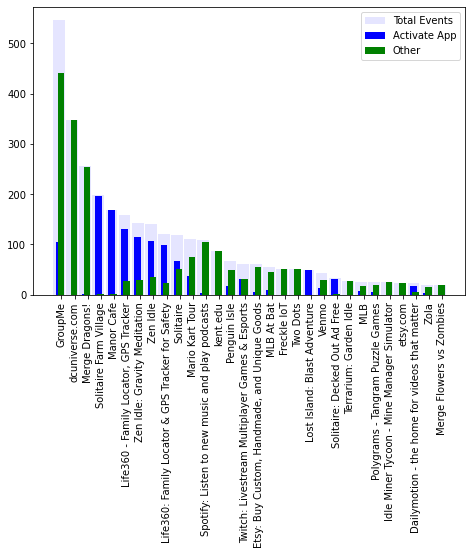

In [13]:
appbyevent = appbyevent.sort_values(by = ['Events'], ascending = False)
X = np.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Events'][0:30], color = 'b', alpha = .1, width = .90)
ax.bar(X + 0.00, appbyevent['Activate App'][0:30], color='b', width = .50)
ax.bar(X + 0.15, appbyevent['Other'][0:30], color='g', width = .50)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Total Events' ,'Activate App', 'Other'])


#### What I discovered

Between looking at this Bar chart and Looking at the frequencies you can see that it accultaly much more common for my facebook data to be accessed though ohter way rather than though some of the apps on my phone. I had thought it would be though apps on my phone becasue I download a lot of ames on my phone that often connect to facebook to dave data. 

It is rather intersting to be proven wrong about where Facebook is gathering a lot of there data from and It is intresting that its often though other sources anf not apps that use on my phone